In [1]:
import numpy as np
import matplotlib as mtlp
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import yaml
import math
import arviz as az
import pandas as pd
from matplotlib import rc
import pickle 
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as mpl_patches
######
import sys
sys.path.append('../HelpherFunctions/')
from ForestPlot import *
## ***************************************************************************
## * RC param                                                                 *
## ***************************************************************************
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'serf'
## ***************************************************************************
filename ="../results/data.yaml"
########
stream = open(filename, 'r')#
dat = yaml.safe_load(stream)
colpastil = ['#9cadce','#bb9cb1','#937eba','#f09494','#72bbd0', '#ffcaaf' ,'#ffafcc','#d3ab9e' ]

In [2]:
LambdaNP=1e+3  #GeV
v= 246.
mh=125.1
def CHtokl(CH):
    return 1-2.0*CH*v**4/mh**2/LambdaNP**2

def kltoCH(kl):
    return LambdaNP**2/v**4*mh**2*0.5*(1-kl)

### Plot the fit summary for $C_{Qt}^{(1)}$

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


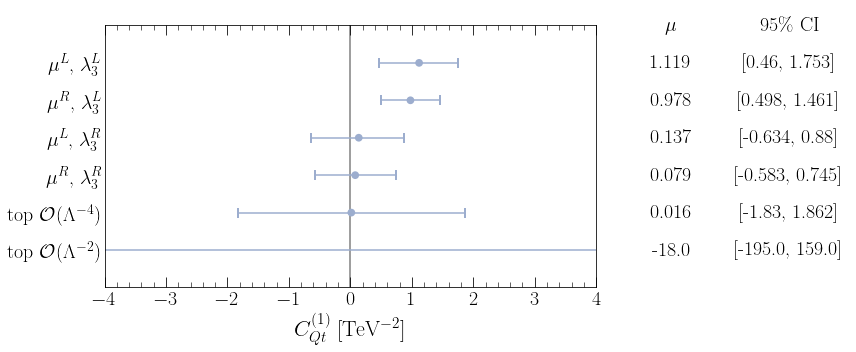

In [8]:
labs = [r"$\mu^L$, $\lambda_3^L$",
        r"$\mu^R$, $\lambda_3^L$",
        r"$\mu^L$, $\lambda_3^R$",
        r"$\mu^R$, $\lambda_3^R$",
       r"top $\mathcal{O}(\Lambda^{-4})$",
       r"top $\mathcal{O}(\Lambda^{-2})$"]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)

files =['../results/fits/Cq1_AllHiggsObs.pickle',
        '../results/fits/Cq1_AllHiggsObs_linearl3.pickle',
        '../results/fits/Cq1_AllHiggsObs_linearmu.pickle',
        '../results/fits/Cq1_AllHiggsObs_linearl3_linearmu.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=4    
ymu=np.insert(ymu,r,0.0-0.5*(1.830-1.862))
yup=np.insert(yup,r,1.862)
ydown=np.insert(ydown,r,-1.830)
    ##
ymu=np.insert(ymu,r+1,0.0-0.5*(195-159))
yup=np.insert(yup,r+1,159)
ydown=np.insert(ydown,r+1,-195)
    #
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.)
errcol=[colpastil[0] for i in range(len(labs))]
p.colors(errorbarcolor=errcol,pointcolor=colpastil[0])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=4, min_value=-4)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{Qt}^{(1)}$ [TeV$^{-2}$]", fontsize=22)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqt1.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

### $C_{Qt}^{(8)}$

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


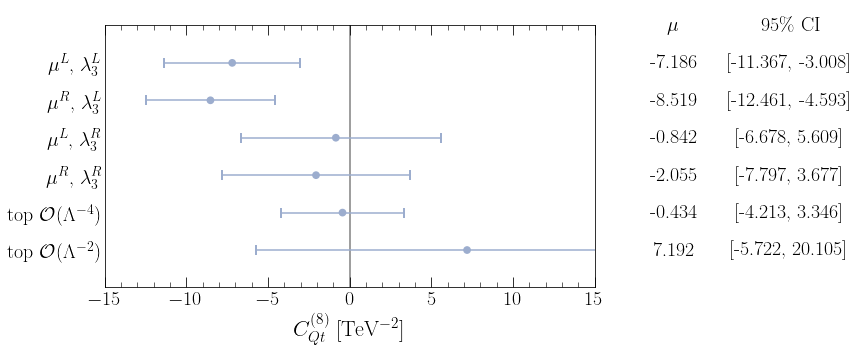

In [7]:
labs = [r"$\mu^L$, $\lambda_3^L$",
        r"$\mu^R$, $\lambda_3^L$",
        r"$\mu^L$, $\lambda_3^R$",
        r"$\mu^R$, $\lambda_3^R$",
       r"top $\mathcal{O}(\Lambda^{-4})$",
       r"top $\mathcal{O}(\Lambda^{-2})$"]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)

files =['../results/fits/Cq8_AllHiggsObs.pickle',
        '../results/fits/Cq8_AllHiggsObs_linearl3.pickle',
        '../results/fits/Cq8_AllHiggsObs_linearmu.pickle',
        '../results/fits/Cq8_AllHiggsObs_linearl3_linearmu.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=4    
ymu=np.insert(ymu,r,0.0-0.5*(4.213-3.346))
yup=np.insert(yup,r,3.346)
ydown=np.insert(ydown,r,-4.213)
    ##
ymu=np.insert(ymu,r+1,0.0-0.5*(5.722-20.105))
yup=np.insert(yup,r+1,20.105)
ydown=np.insert(ydown,r+1,-5.722)
    #
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.)
errcol=[colpastil[0] for i in range(len(labs))]
p.colors(errorbarcolor=errcol,pointcolor=colpastil[0])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=15, min_value=-15)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{Qt}^{(8)}$ [TeV$^{-2}$]", fontsize=22)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqt8.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

### $C_{QtQb}^{(1)} $

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


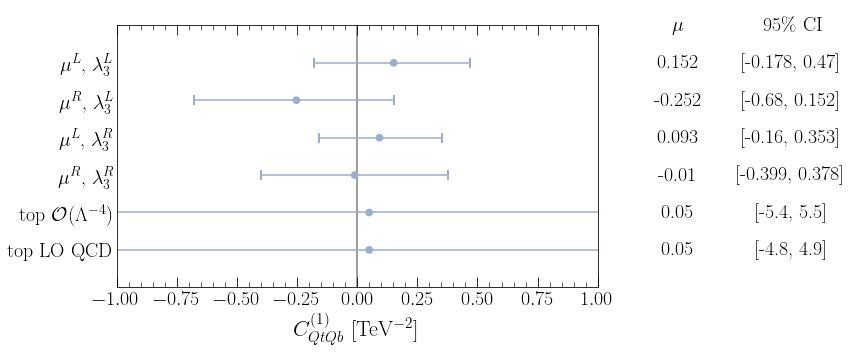

In [6]:
labs = [r"$\mu^L$, $\lambda_3^L$",
        r"$\mu^R$, $\lambda_3^L$",
        r"$\mu^L$, $\lambda_3^R$",
        r"$\mu^R$, $\lambda_3^R$",
        r"top $\mathcal{O}(\Lambda^{-4})$",
        r"top LO QCD" ]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =['../results/fits/Cqtqb1_AllHiggsObs.pickle',
        '../results/fits/Cqtqb1_AllHiggsObs_linearl3.pickle',
        '../results/fits/Cqtqb1_AllHiggsObs_linearmu.pickle',
        '../results/fits/Cqtqb1_AllHiggsObs_linearl3_linearmu.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=4    
ymu=np.insert(ymu,r,0.0-0.5*(5.4-5.5))
yup=np.insert(yup,r,5.5)
ydown=np.insert(ydown,r,-5.4)
    #
ymu=np.insert(ymu,r+1,0.0-0.5*(4.8-4.9))
yup=np.insert(yup,r+1,4.9)
ydown=np.insert(ydown,r+1,-4.8)        
    #
errcol=[colpastil[0] for i in range(len(labs))]
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.)
p.colors(errorbarcolor=errcol,pointcolor=colpastil[0])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=1, min_value=-1)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{QtQb}^{(1)}$ [TeV$^{-2}$]", fontsize=22)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqtqb1.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

### $C_{QtQb}^{8}$

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


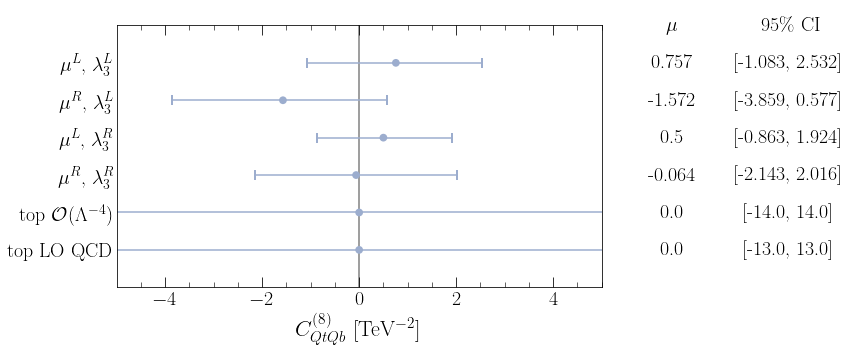

In [5]:
labs = [r"$\mu^L$, $\lambda_3^L$",
        r"$\mu^R$, $\lambda_3^L$",
        r"$\mu^L$, $\lambda_3^R$",
        r"$\mu^R$, $\lambda_3^R$",
        r"top $\mathcal{O}(\Lambda^{-4})$",
        r"top LO QCD" ]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =['../results/fits/Cqtqb8_AllHiggsObs.pickle',
        '../results/fits/Cqtqb8_AllHiggsObs_linearl3.pickle',
        '../results/fits/Cqtqb8_AllHiggsObs_linearmu.pickle',
        '../results/fits/Cqtqb8_AllHiggsObs_linearl3_linearmu.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0]     
    # add 4 top data 
r=4    
ymu=np.insert(ymu,r,0.0)
yup=np.insert(yup,r,14.0)
ydown=np.insert(ydown,r,-14)
    #
ymu=np.insert(ymu,r+1,0.0)
yup=np.insert(yup,r+1,13.0)
ydown=np.insert(ydown,r+1,-13.0)        
    #
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.)
errcol=[colpastil[0] for i in range(len(labs))]
p.colors(errorbarcolor=errcol,pointcolor=colpastil[0])
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=5, min_value=-5)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{QtQb}^{(8)}$ [TeV$^{-2}$]", fontsize=22)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_Cqtqb8.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
#################################

## New Wilson Coeffecients 

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


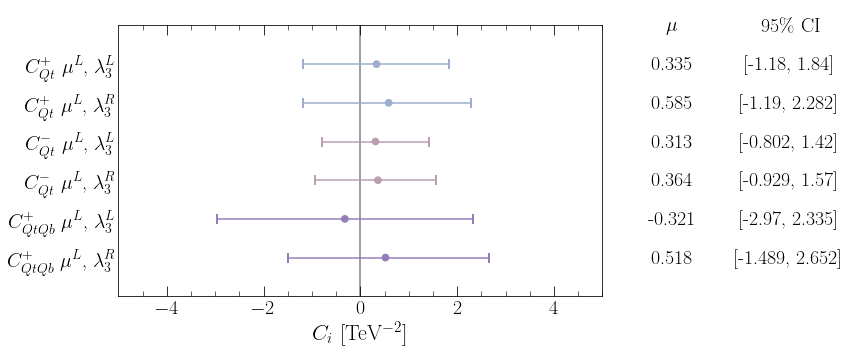

In [4]:
labs = [r"$ C_{Qt}^{+}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{Qt}^{+}\,\,\mu^L$, $\lambda_3^R$",
       r"$ C_{Qt}^{-}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{Qt}^{-}\,\,\mu^L$, $\lambda_3^R$",
       r"$ C_{QtQb}^{+}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{QtQb}^{+}\,\,\mu^L$, $\lambda_3^R$"]

    
ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =['../results/fits/CQtp.pickle',
        '../results/fits/CQtp_lambda3R.pickle',
        '../results/fits/CQtm.pickle',
        '../results/fits/CQtm_lambda3R.pickle',
        '../results/fits/CQtQbp.pickle',
        '../results/fits/CQtQbp_lambda3R.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['C4Q']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['C4Q']['mean']])
        ydown=np.append(ydown,[df_2.loc['C4Q']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0] 
 
p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.)
errcol=[colpastil[0],colpastil[0],colpastil[1],colpastil[1],colpastil[2],colpastil[2]  ]
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(12,5), t_adjuster=0.07, max_value=5, min_value=-5)

        
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{i}$ [TeV$^{-2}$]", fontsize=22)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_neu.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################


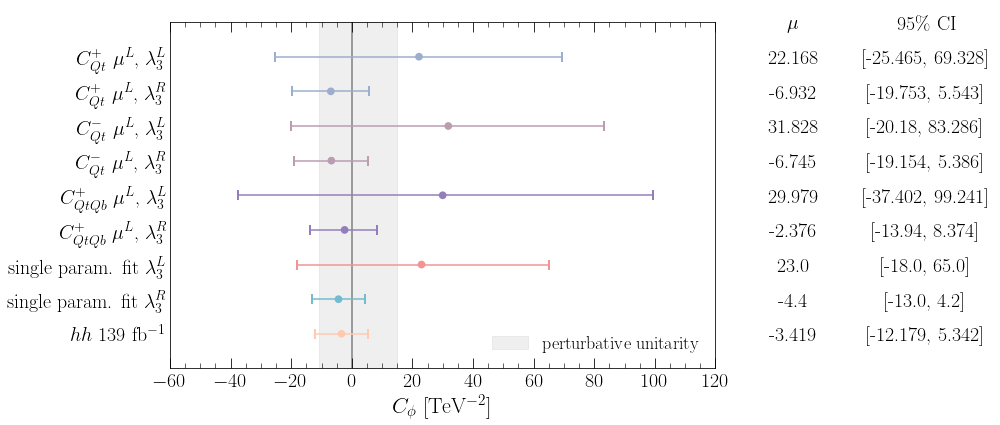

In [28]:
labs = [r"$ C_{Qt}^{+}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{Qt}^{+}\,\,\mu^L$, $\lambda_3^R$",
       r"$ C_{Qt}^{-}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{Qt}^{-}\,\,\mu^L$, $\lambda_3^R$",
       r"$ C_{QtQb}^{+}\,\,\mu^L$, $\lambda_3^L$",
        r"$C_{QtQb}^{+}\,\,\mu^L$, $\lambda_3^R$",
         r'single param. fit $\lambda_3^L$',
       r'single param. fit $\lambda_3^R$',
        r'$hh$ 139 fb$^{-1}$' ]

ymu=np.zeros(1)
yup=np.zeros(1)
ydown=np.zeros(1)
files =['../results/fits/CQtp.pickle',
        '../results/fits/CQtp_lambda3R.pickle',
        '../results/fits/CQtm.pickle',
        '../results/fits/CQtm_lambda3R.pickle',
        '../results/fits/CQtQbp.pickle',
        '../results/fits/CQtQbp_lambda3R.pickle']
for modelfile in files:
    with open(modelfile, 'rb') as buff:
        data = pickle.load(buff)
        model = data['model']
        trace = data['trace']
        df_2 = pd.DataFrame(az.summary(trace, kind='stats', hdi_prob=0.9545, round_to='none', stat_funcs=stats_func_2))
        yup=np.append(yup,[df_2.loc['Cphi']['hdi_97.725%']])
        ymu=np.append(ymu,[df_2.loc['Cphi']['mean']])
        ydown=np.append(ydown,[df_2.loc['Cphi']['hdi_2.275%']])
yup= yup[yup!=0]
ymu= ymu[ymu!=0]
ydown= ydown[ydown!=0] 

###
r=6    
#single param fit l3 linear
ymu=np.insert(ymu,r,23)
yup=np.insert(yup,r,65)
ydown=np.insert(ydown,r,-18)
    #l3 R
ymu=np.insert(ymu,r+1,-4.4)
ydown=np.insert(ydown,r+1,-13.0)
yup=np.insert(yup,r+1,4.2)   

    # hh
ymu=np.insert(ymu,r+2,kltoCH(6.7)+0.5*(-kltoCH(6.7)+kltoCH(-1.5)))
ydown=np.insert(ydown,r+2,kltoCH(6.7))
yup=np.insert(yup,r+2,kltoCH(-1.5))  
#####    



p = ForestPlot(label=labs, effect_measure=ymu, lcl=ydown, ucl=yup)
p.labels(center=0.)
errcol=[colpastil[0],colpastil[0],colpastil[1],colpastil[1],colpastil[2],colpastil[2],colpastil[3] ,colpastil[4],colpastil[5]    ]
p.colors(errorbarcolor=errcol,pointcolor=errcol)
ax=p.plot(figsize=(14,6), t_adjuster=0.045, max_value=120, min_value=-60)

ax.axvspan(kltoCH(6.0),kltoCH(-6.0), alpha=0.12, color='gray',label=r'perturbative unitarity')        
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.set_xlabel(r"$C_{\phi}$ [TeV$^{-2}$]", fontsize=22)
#ax.text(-5.,0.0,r"perturbative unitarity",fontsize=16)
ax.legend(fontsize=18,frameon=False)
plt.tight_layout()
plt.savefig('../results/plots/uebeblick_neu_cphi.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
##################################